<a href="https://colab.research.google.com/github/Diego1997H/Python-for-Datascience/blob/main/WildCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. Loading the Dataset and Required Libraries

In [2]:
#Import the dataset

#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mlxtend
from scipy import stats
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from collections import Counter

#Load the dataset
df = pd.read_excel('/content/WildcatData.xlsx')

In [3]:
#Display the first few rows
print("Preview of the dataset:")
df.head()

Preview of the dataset:


,Invoice ID,Date,Product Name,Unit Price,Quantity,Total,Location
0,6.166534e+07,2021-01-28,"Clancys, mini & sticks Pretzels 16 oz",1.29,17,21.93,A
1,6.166534e+07,2021-01-28,Mini butter croissants 4 ct,3.99,4,15.96,A
2,6.166534e+07,2021-01-28,"Belmont, assorted flavors Ice Cream, premium 1...",2.49,5,12.45,A
3,6.166534e+07,2021-01-28,"Freshire Farms Carrots, whole 2 lbs",1.29,25,32.25,A
4,6.166534e+07,2021-01-28,"Baker's Corner, enriched and bleached Flour, s...",1.59,24,38.16,A


Step 2: Running Descriptive Statistics

In [4]:
print('\nSummary statistics of the dataset:')
df.describe()


Summary statistics of the dataset:


,Invoice ID,Date,Unit Price,Quantity,Total
count,4.838270e+05,483827,483827.000000,483827.000000,483827.000000
mean,6.155540e+14,2021-01-16 06:01:31.118519808,1.957834,10.451971,20.467709
min,6.166534e+07,2021-01-01 00:00:00,0.000000,1.000000,0.000000
25%,3.372043e+10,2021-01-09 00:00:00,1.190000,5.000000,7.560000
50%,6.738533e+10,2021-01-16 00:00:00,1.690000,10.000000,16.100000
75%,4.766228e+11,2021-01-24 00:00:00,2.490000,15.000000,28.310000
max,9.988865e+15,2021-01-31 00:00:00,5.990000,25.000000,149.750000
std,1.912994e+15,NaN,1.101692,5.744350,17.278309


In [6]:
#Return a series with the data type of each column
print("Data types of each column:")
df.dtypes

Data types of each column:


,0
Invoice ID,float64
Date,datetime64[ns]
Product Name,object
Unit Price,float64
Quantity,int64
Total,float64
Location,object


Step 3: Data Cleaning

In [7]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Invoice ID      0
Date            0
Product Name    0
Unit Price      0
Quantity        0
Total           0
Location        0
dtype: int64


In [8]:
# Filter rows where a UnitPrice equals 0
print("Rows with a UnitPrice equal to 0:")
df.loc[df['Unit Price'] == 0]

Rows with a UnitPrice equal to 0:


,Invoice ID,Date,Product Name,Unit Price,Quantity,Total,Location
15,6.166534e+07,2021-01-28,"Fit & Active Soup, Chicken Noodle, regular 18....",0.0,5,0.0,A


In [9]:
#Validate the total is equal to Quantity by Unit Price
df_check = df.copy()

df_check['Computed Total'] = df_check['Unit Price'] * df_check['Quantity']
df_check['Total_Match'] = df_check['Total'].round(2) == df_check['Computed Total'].round(2)

print(df_check['Total_Match'].value_counts())

Total_Match
True    483827
Name: count, dtype: int64


In [10]:
# Drop rows where 'Unit Price' is 0
df1 = df[df['Unit Price'] != 0].copy()

In [11]:
# Add 'Day Of Week' column
df1['Day Of Week'] = df['Date'].dt.day_name()

In [12]:
# Transform data types

# InvoiceID to string
df1['Invoice ID'] = df1['Invoice ID'].astype(str)

# Location to category
df1['Location'] = df1['Location'].astype('category')

# Product name to string
df1['Product Name'] = df1['Product Name'].astype('string')

# Date to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Day Of Week to category
df1['Day Of Week'] = df1['Day Of Week'].astype('category')

In [13]:
#Return a series with the data type of each column
print("Data types of each column:")
df1.dtypes

Data types of each column:


,0
Invoice ID,object
Date,datetime64[ns]
Product Name,string[python]
Unit Price,float64
Quantity,int64
Total,float64
Location,category
Day Of Week,category


In [15]:
#Display the first few rows
print("Preview of the modified dataset:")
df1.head()

Preview of the modified dataset:


,Invoice ID,Date,Product Name,Unit Price,Quantity,Total,Location,Day Of Week
0,61665336.21096981,2021-01-28,"Clancys, mini & sticks Pretzels 16 oz",1.29,17,21.93,A,Thursday
1,61665336.21096981,2021-01-28,Mini butter croissants 4 ct,3.99,4,15.96,A,Thursday
2,61665336.21096981,2021-01-28,"Belmont, assorted flavors Ice Cream, premium 1...",2.49,5,12.45,A,Thursday
3,61665336.21096981,2021-01-28,"Freshire Farms Carrots, whole 2 lbs",1.29,25,32.25,A,Thursday
4,61665336.21096981,2021-01-28,"Baker's Corner, enriched and bleached Flour, s...",1.59,24,38.16,A,Thursday


In [18]:
print('\nSummary statistics of the dataset:')
df1.describe()


Summary statistics of the dataset:


,Date,Unit Price,Quantity,Total
count,483826,483826.000000,483826.000000,483826.000000
mean,2021-01-16 06:01:29.020433152,1.957838,10.451983,20.467752
min,2021-01-01 00:00:00,0.290000,1.000000,0.290000
25%,2021-01-09 00:00:00,1.190000,5.000000,7.560000
50%,2021-01-16 00:00:00,1.690000,10.000000,16.100000
75%,2021-01-24 00:00:00,2.490000,15.000000,28.310000
max,2021-01-31 00:00:00,5.990000,25.000000,149.750000
std,NaN,1.101690,5.744350,17.278302


Step 4. Data Analysis

Text(0, 0.5, 'Count')

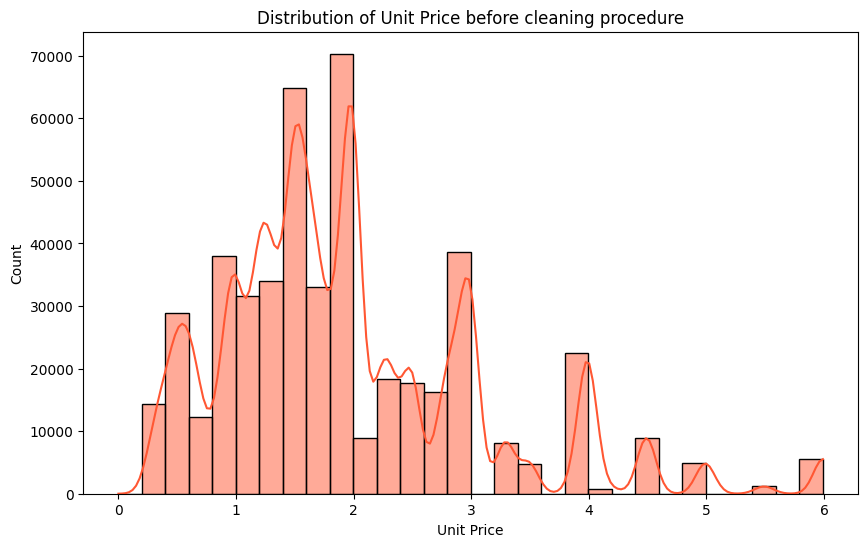

In [19]:
# Plot Unit Price distribution before modification
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Unit Price', bins=30, color='#FF5733', kde=True)
plt.title('Distribution of Unit Price before cleaning procedure')
plt.xlabel('Unit Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

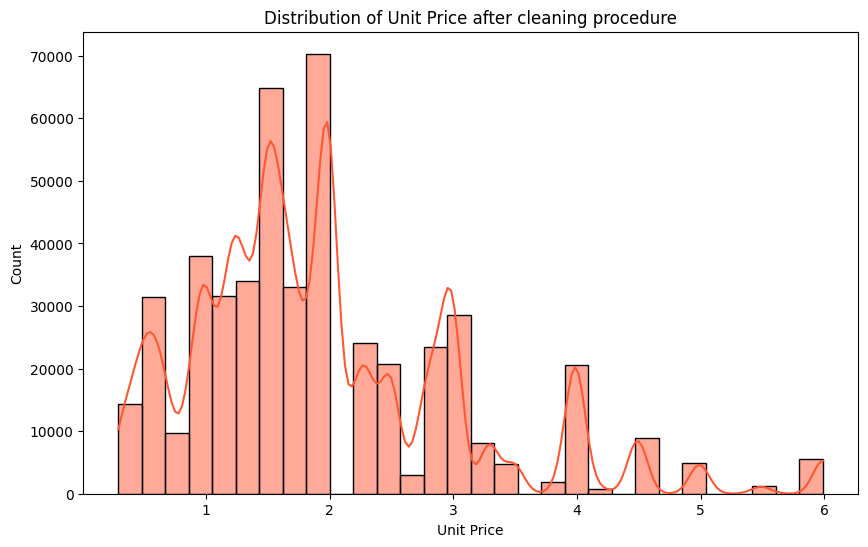

In [20]:
# Plot Unit Price distribution after modification
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Unit Price', bins=30, color='#FF5733', kde=True)
plt.title('Distribution of Unit Price after cleaning procedure')
plt.xlabel('Unit Price')
plt.ylabel('Count')

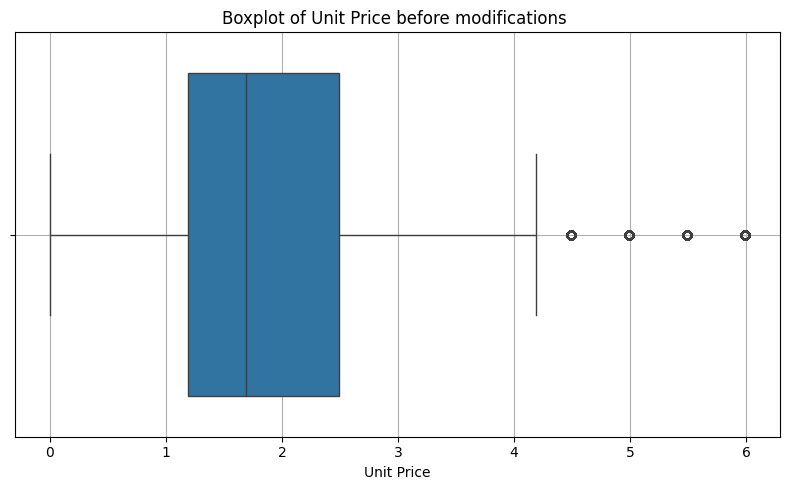

In [21]:
# Boxplot for UnitPrice
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Unit Price'])
plt.title('Boxplot of Unit Price before modifications ')
plt.xlabel('Unit Price')
plt.grid(True)
plt.tight_layout()
plt.show()

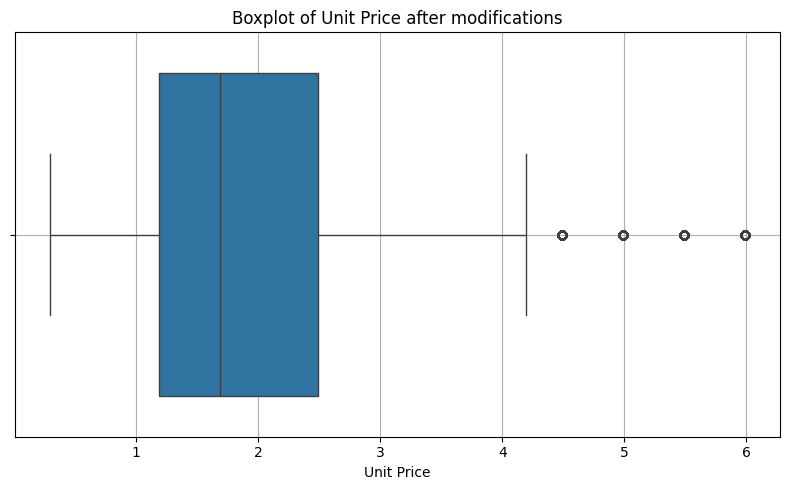

In [22]:
# Boxplot for UnitPrice
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['Unit Price'])
plt.title('Boxplot of Unit Price after modifications')
plt.xlabel('Unit Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
#Calculate number of outliers
Q1 = df1['Unit Price'].quantile(0.25)
Q3 = df1['Unit Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Quartiles and outliers in Unit Price")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df1[(df1['Unit Price'] < lower_bound) | (df1['Unit Price'] > upper_bound)]

# Count of outliers
print(f"Number of outliers in Unit Price: {outliers.shape[0]}")

Quartiles and outliers in Unit Price
Q1: 1.19
Q3: 2.49
IQR: 1.3000000000000003
Lower Bound: -0.7600000000000005
Upper Bound: 4.44
Number of outliers in Unit Price: 20575


In [27]:
#Top 10 selling product by number of transactions

# Group by 'Product Name' and count the number of transactions
top_products = df1.groupby('Product Name')['Invoice ID'].count().sort_values(ascending=False).head(10)

# Print the top 10 selling products
print("Top 10 selling products by number of transactions:\n", top_products)

Top 10 selling products by number of transactions:
 Product Name
Chef's Cupboard Soup, Tomato, condensed 10.75 oz                                11483
Friendly Farms, regular or light Sour Cream 16 oz                               10707
Baker's Corner Sugar, brown 32 oz                                                9299
Reggano, traditional, meat or mushroom Spaghetti Sauce 24 oz                     9299
No name, 85%, all natural Ground Beef, frozen 1 lb                               8718
Baker's Corner Sugar, powdered 32 oz                                             7778
Lunch Mate, ham, chicken or turkey Cold Cuts, ham or chicken 1 lb                7052
Fit & Active Soup, Chicken Noodle, regular 18.6 oz                               7019
Kirkwood Ground Turkey, frozen 1 lb                                              6533
Mahi Mahi, Sea Queen, 4 fillets (wild caught) (mahi mahi and/or other) 24 oz     6321
Name: Invoice ID, dtype: int64


In [28]:
# Top 10 Products by Revenue
top_products = df1.groupby('Product Name')['Total'].sum().sort_values(ascending=False).head(10)

print('Top Products by Revenue')
top_products

Top Products by Revenue


,Total
Product Name,
"Mahi Mahi, Sea Queen, 4 fillets (wild caught) (mahi mahi and/or other) 24 oz",264660.69
"No name, 85%, all natural Ground Beef, frozen 1 lb",255360.33
"Grandessa, German Roasted, mild or regular Coffee 17.6 oz",253392.20
"Tilapia, Sea Queen, 6 fillets Fish 2, frozen (tilapia) 24 oz",252558.01
"Kirkwood Chicken Tenderloins, frozen 2.5 lbs",251861.53
"Lunch Mate, ham, chicken or turkey Cold Cuts, ham or chicken 1 lb",243828.48
Mini butter croissants 4 ct,224617.05
"Sea Queen, 4 fillets (wild caught) Fish 1, frozen (flounder) 16 oz",222602.10
"Fit & Active, Prestage Farms Ground Turkey 19.2 oz",194415.78


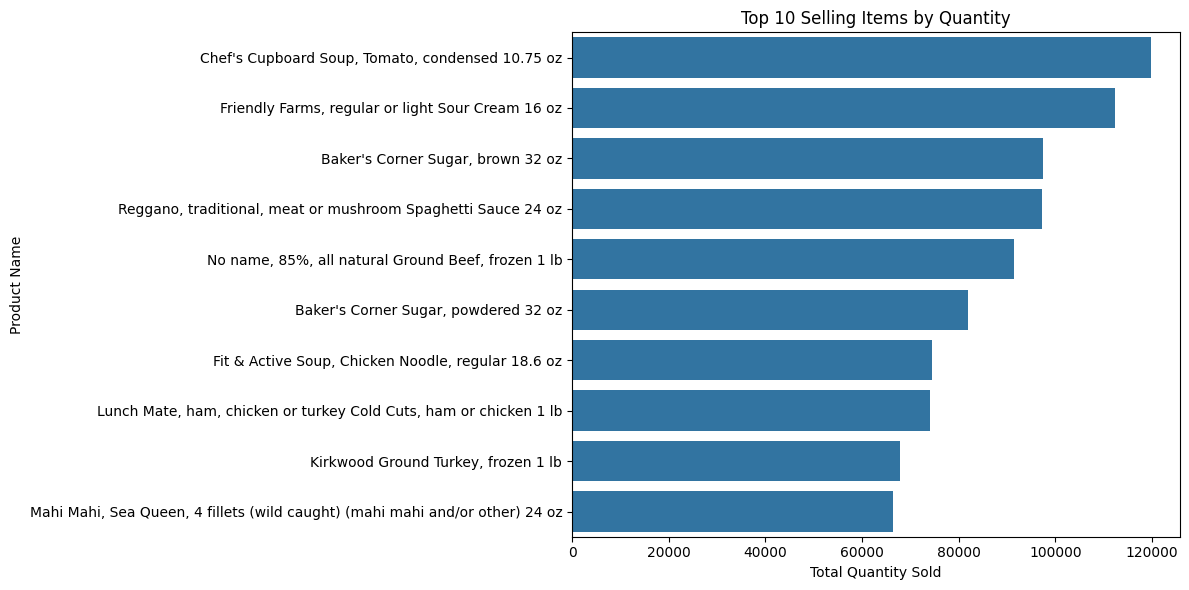

In [29]:
# Top 10 selling products by quantity
# Calculate the top 10 selling items by quantity
top_10_items = df1.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_items.index, x=top_10_items.values)  # Changed x and y
plt.ylabel('Product Name')  # Swapped xlabel and ylabel
plt.xlabel('Total Quantity Sold')  # Swapped xlabel and ylabel
plt.title('Top 10 Selling Items by Quantity')
plt.tight_layout()
plt.show()

Top 10 selling items in location A by frequency:
 Product Name
Chef's Cupboard Soup, Tomato, condensed 10.75 oz                     2516
Friendly Farms, regular or light Sour Cream 16 oz                    2313
Reggano, traditional, meat or mushroom Spaghetti Sauce 24 oz         2056
No name, 85%, all natural Ground Beef, frozen 1 lb                   1960
Baker's Corner Sugar, brown 32 oz                                    1957
Baker's Corner Sugar, powdered 32 oz                                 1718
Lunch Mate, ham, chicken or turkey Cold Cuts, ham or chicken 1 lb    1544
Fit & Active Soup, Chicken Noodle, regular 18.6 oz                   1505
Kirkwood Ground Turkey, frozen 1 lb                                  1482
Fit & Active, Prestage Farms Ground Turkey 19.2 oz                   1408
Name: count, dtype: Int64


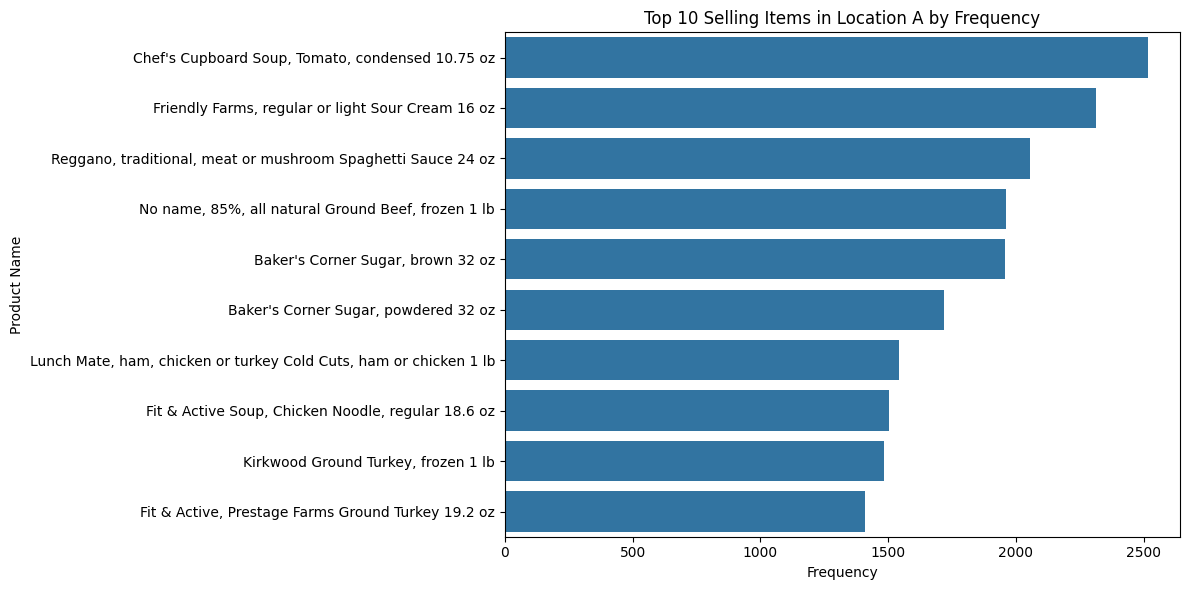

In [30]:
# Top 10 Selling products by Location A
# Filter for location A
location_a_df1 = df1[df1['Location'] == 'A']

# Calculate the top 10 selling items by frequency in location A
top_10_location_a = location_a_df1['Product Name'].value_counts().head(10)

# Print the top 10 selling items in location A
print("Top 10 selling items in location A by frequency:\n", top_10_location_a)

# Create the bar chart for location A
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_location_a.values, y=top_10_location_a.index)
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Items in Location A by Frequency')
plt.tight_layout()
plt.show()

Top 10 selling items in location B by frequency:
 Product Name
Chef's Cupboard Soup, Tomato, condensed 10.75 oz                                2872
Friendly Farms, regular or light Sour Cream 16 oz                               2603
Baker's Corner Sugar, brown 32 oz                                               2327
Reggano, traditional, meat or mushroom Spaghetti Sauce 24 oz                    2287
No name, 85%, all natural Ground Beef, frozen 1 lb                              2157
Baker's Corner Sugar, powdered 32 oz                                            1950
Lunch Mate, ham, chicken or turkey Cold Cuts, ham or chicken 1 lb               1737
Fit & Active Soup, Chicken Noodle, regular 18.6 oz                              1718
Mahi Mahi, Sea Queen, 4 fillets (wild caught) (mahi mahi and/or other) 24 oz    1562
Kirkwood Ground Turkey, frozen 1 lb                                             1555
Name: count, dtype: Int64


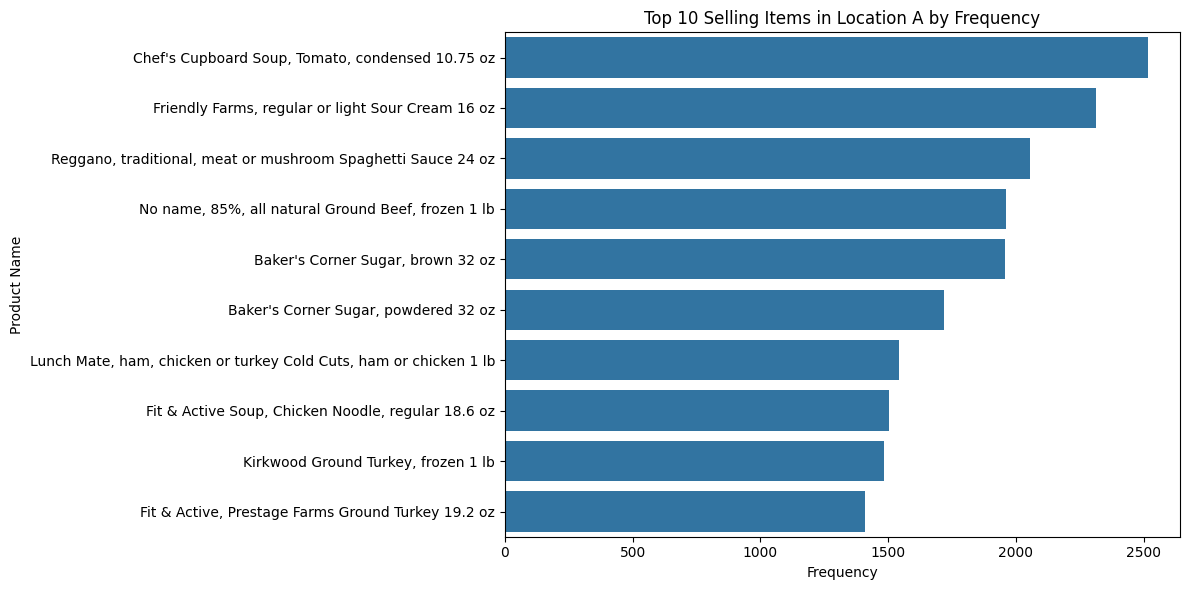

In [31]:
# Top 10 Selling products by Location B
# Filter for location A
location_b_df1 = df1[df1['Location'] == 'B']

# Calculate the top 10 selling items by frequency in location A
top_10_location_b = location_b_df1['Product Name'].value_counts().head(10)

# Print the top 10 selling items in location A
print("Top 10 selling items in location B by frequency:\n", top_10_location_b)

# Create the bar chart for location A
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_location_a.values, y=top_10_location_a.index)
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Items in Location A by Frequency')
plt.tight_layout()
plt.show()

<ipython-input-32-214d4d4abd57>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sales = location_data.groupby('Day Of Week')['Total'].sum().reindex(day_order)  # Reindex
<ipython-input-32-214d4d4abd57>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sales = location_data.groupby('Day Of Week')['Total'].sum().reindex(day_order)  # Reindex
<ipython-input-32-214d4d4abd57>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence th

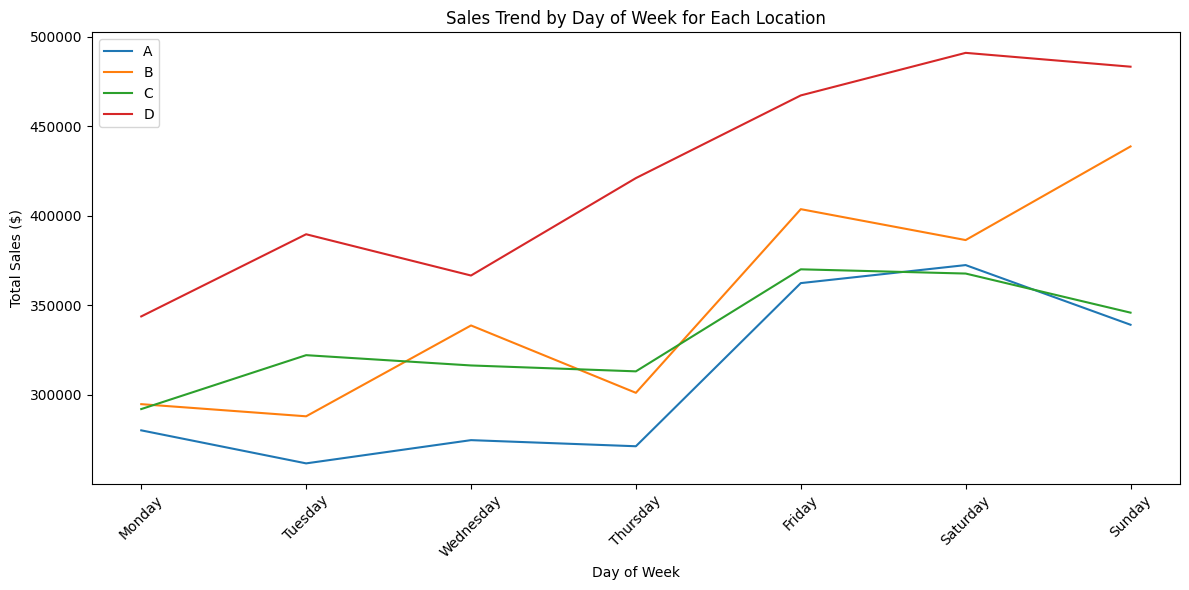

In [32]:
# Sales trend by location
# Create the sales trend plot
plt.figure(figsize=(12, 6))

# Define the desired order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for location in df1['Location'].unique():
    location_data = df1[df1['Location'] == location]
    daily_sales = location_data.groupby('Day Of Week')['Total'].sum().reindex(day_order)  # Reindex
    plt.plot(daily_sales.index, daily_sales.values, label=location)

plt.xlabel('Day of Week')
plt.ylabel('Total Sales ($)')
plt.title('Sales Trend by Day of Week for Each Location')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-33-4790a9963e53>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df1.pivot_table(index='Location', columns='Day Of Week', values='Total', aggfunc='sum')


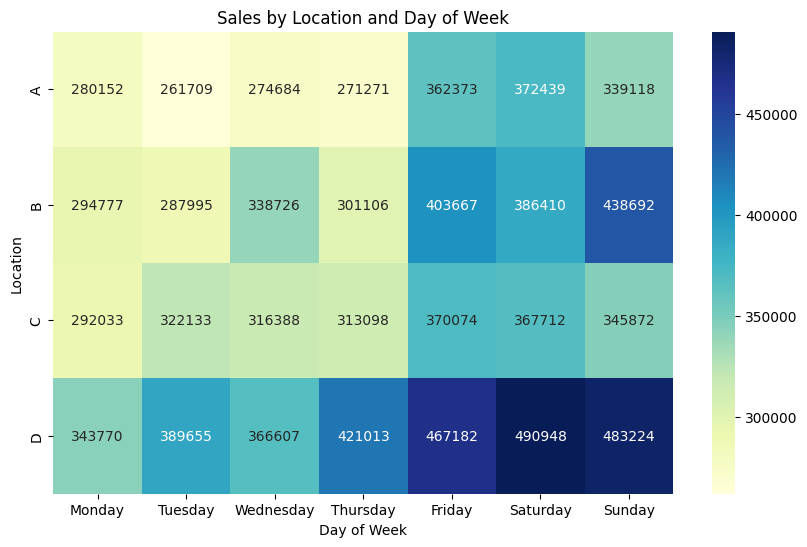

In [33]:
# Sales heatmap by Location
# Create a pivot table for the heatmap
heatmap_data = df1.pivot_table(index='Location', columns='Day Of Week', values='Total', aggfunc='sum')

# Reorder the columns for days of the week (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(columns=days_order)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Sales by Location and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Location')
plt.show()

<ipython-input-34-2256283ec9f5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_sales = df1.groupby('Location')['Total'].sum().sort_values(ascending=False)
<ipython-input-34-2256283ec9f5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


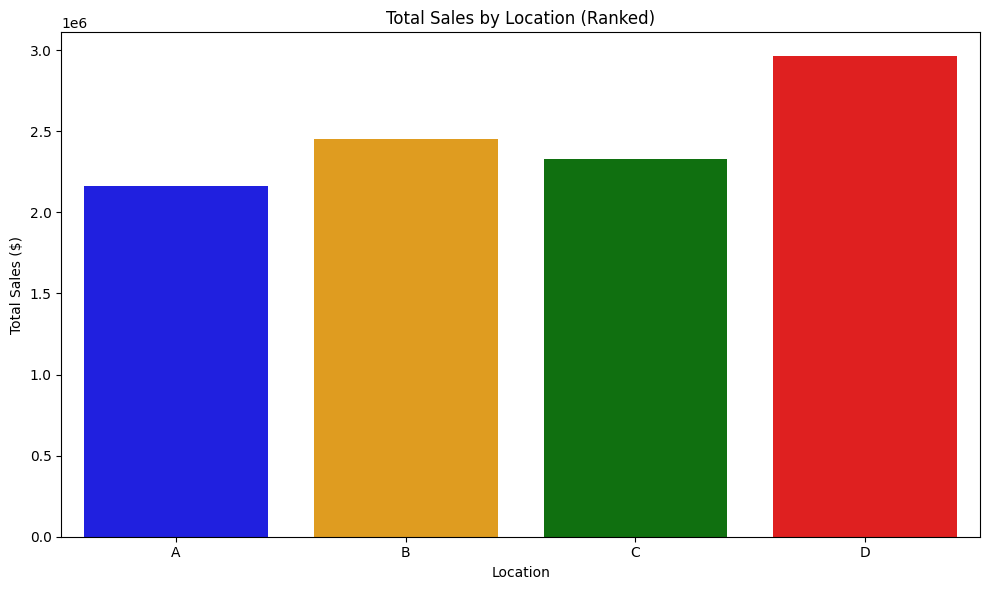

In [34]:
# Total sales by location
# Group and sort
location_sales = df1.groupby('Location')['Total'].sum().sort_values(ascending=False)

# Convert to DataFrame for clarity
location_sales_df = location_sales.reset_index()

# Define color palette
location_colors = {
    'A': 'blue',
    'B': 'orange',
    'C': 'green',
    'D': 'red'
}

# Create the bar chart using the palette mapping
plt.figure(figsize=(10, 6))
sns.barplot(
    data=location_sales_df,
    x='Location',
    y='Total',
    palette=location_colors  # Automatically matches 'Location' to color
)

plt.ylabel('Total Sales ($)')
plt.xlabel('Location')
plt.title('Total Sales by Location (Ranked)')
plt.tight_layout()
plt.show()

In [36]:
# Two most frequently bought together in Location A
from itertools import combinations
# Group products by transaction (Invoice ID)
grouped = location_a_df1.groupby('Invoice ID')['Product Name'].apply(list)

# Get all product pairs in each transaction (combinations of 2)
pairs = []
for products in grouped:
    if len(products) >= 2:
        pairs.extend(combinations(sorted(set(products)), 2))

# Count the most common pairs
pair_counts_a = Counter(pairs)
top_pairs_a = pair_counts_a.most_common(2)  # Get top 2 pairs


print("The two products most frequently bought together in Location A:")
for pair, count in top_pairs_a:
    print(f'{pair[0]} & {pair[1]}: {count} times')

The two products most frequently bought together in Location A:
Chef's Cupboard Soup, Tomato, condensed 10.75 oz & Friendly Farms, regular or light Sour Cream 16 oz: 798 times
Chef's Cupboard Soup, Tomato, condensed 10.75 oz & Reggano, traditional, meat or mushroom Spaghetti Sauce 24 oz: 765 times


In [37]:
# Two most frequently bought together in Location B
# Group products by transaction (Invoice ID)
grouped = location_b_df1.groupby('Invoice ID')['Product Name'].apply(list)

# Get all product pairs in each transaction (combinations of 2)
pairs = []
for products in grouped:
    if len(products) >= 2:
        pairs.extend(combinations(sorted(set(products)), 2))

# Count the most common pairs
pair_counts_b = Counter(pairs)
top_pairs_b = pair_counts_b.most_common(2)  # Get top 2 pairs

print("\nThe two products most frequently bought together in Location B:")
for pair, count in top_pairs_b:
    print(f'{pair[0]} & {pair[1]}: {count} times')


The two products most frequently bought together in Location B:
Chef's Cupboard Soup, Tomato, condensed 10.75 oz & Friendly Farms, regular or light Sour Cream 16 oz: 888 times
Chef's Cupboard Soup, Tomato, condensed 10.75 oz & Reggano, traditional, meat or mushroom Spaghetti Sauce 24 oz: 864 times


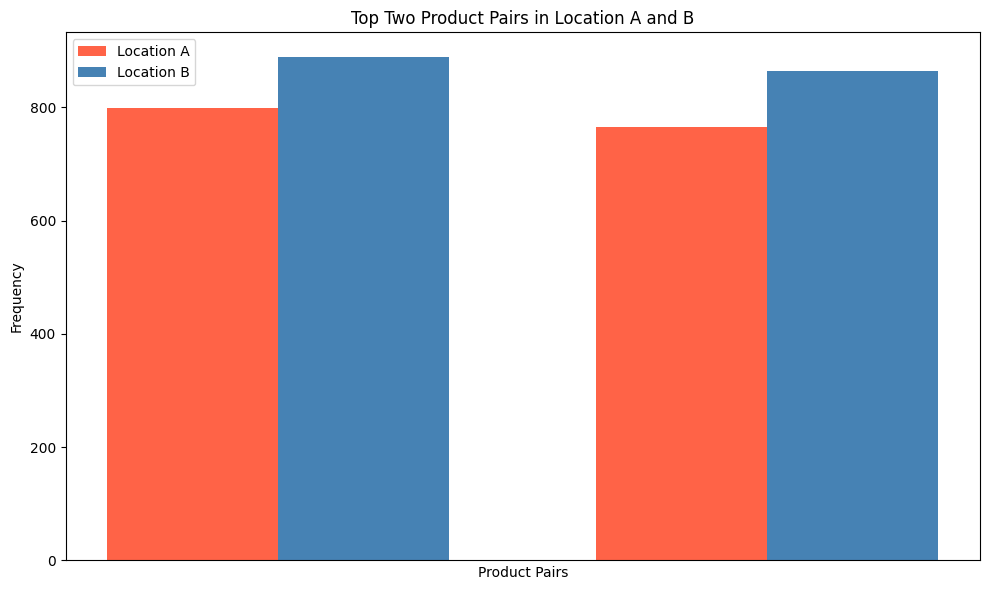

In [38]:
# Extract product pair names and counts for location A
products_a = [f"{pair[0]} & {pair[1]}" for pair, count in top_pairs_a]
counts_a = [count for pair, count in top_pairs_a]

# Extract product pair names and counts for location B
products_b = [f"{pair[0]} & {pair[1]}" for pair, count in top_pairs_b]
counts_b = [count for pair, count in top_pairs_b]

# Define bar positions
index = np.arange(len(products_a))
bar_width = 0.35

# Create the plot
plt.figure(figsize=(10, 6))

bars_a = plt.bar(index, counts_a, bar_width, label='Location A', color='tomato')
bars_b = plt.bar(index + bar_width, counts_b, bar_width, label='Location B', color='steelblue')

# Remove x-axis ticks
plt.xticks([])


plt.xlabel('Product Pairs')
plt.ylabel('Frequency')
plt.title('Top Two Product Pairs in Location A and B')
plt.legend()
plt.tight_layout()
plt.show()

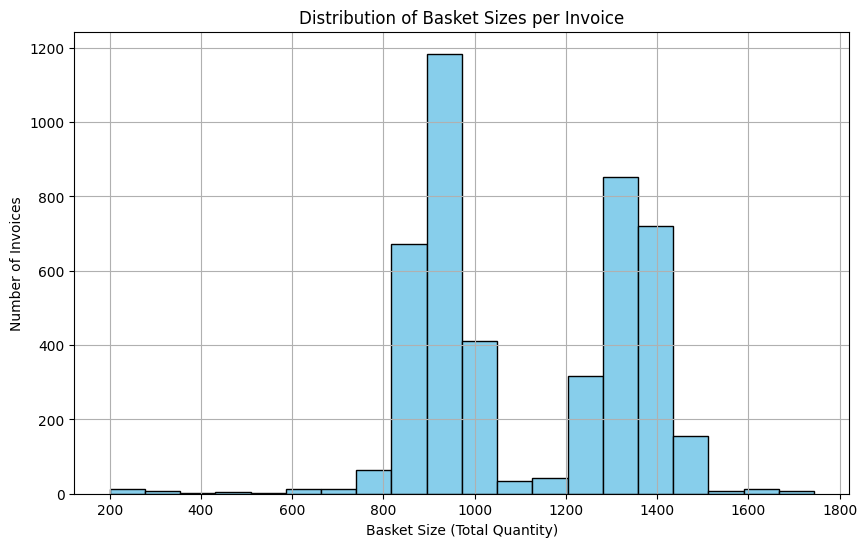

In [39]:
# Creatde a Distribution of Basket Sizes per Invoice
# Calculate basket size per invoice
basket_sizes = df1.groupby('Invoice ID')['Quantity'].sum()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(basket_sizes, bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.xlabel('Basket Size (Total Quantity)')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Basket Sizes per Invoice')
plt.grid(True)
plt.show()

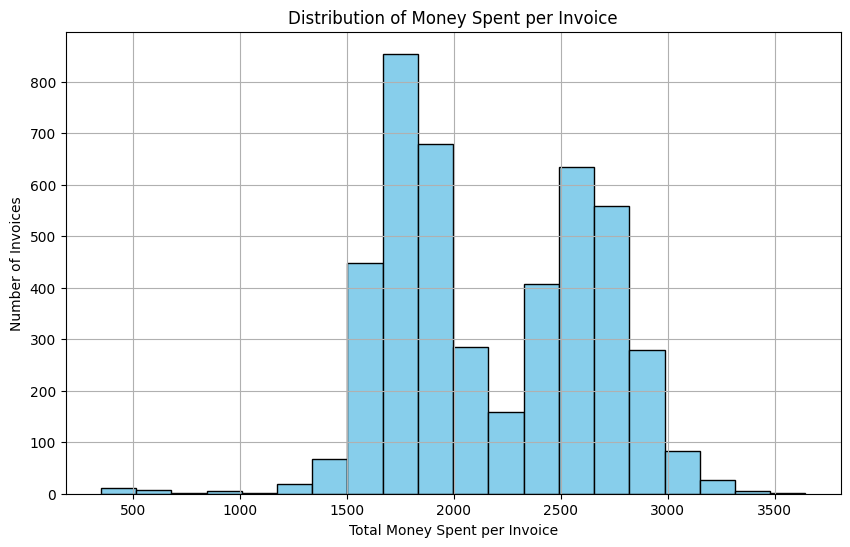

In [40]:
# Create a Distribution of Money Spent per Invoice
# Calculate total money spent per invoice
money_spent = df1.groupby('Invoice ID')['Total'].sum()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(money_spent, bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.xlabel('Total Money Spent per Invoice')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Money Spent per Invoice')
plt.grid(True)
plt.show()